In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

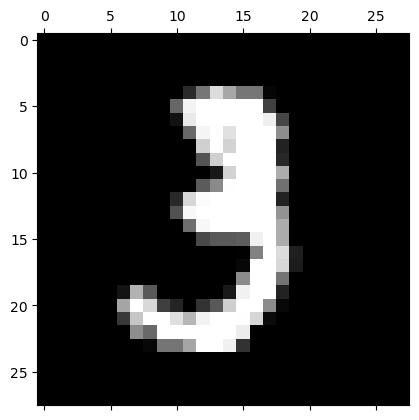

In [14]:
plt.gray()
plt.matshow(X_train[10])

In [15]:
y_train[10]

3

In [16]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train=X_train/255
X_test=X_test/255


In [30]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [31]:
X_train_flattened.shape

(60000, 784)

In [32]:
X_test_flattened.shape

(10000, 784)

In [33]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
# seq:=stack of layers in my neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8074 - loss: 0.7347
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9149 - loss: 0.3060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9204 - loss: 0.2868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9238 - loss: 0.2816
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9268 - loss: 0.2692


In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9139 - loss: 0.3078


[0.27098703384399414, 0.9254000186920166]

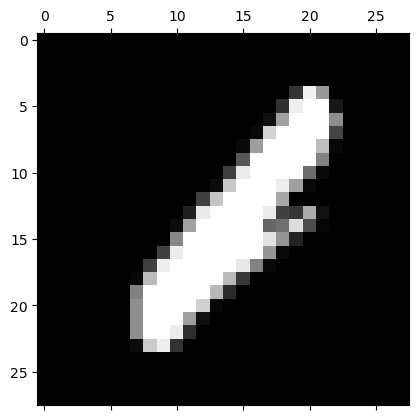

In [50]:
plt.matshow(X_test[1900])

In [51]:
y_pred=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


In [54]:
y_pred[1900]

array([1.7725544e-05, 9.2225999e-01, 6.8046242e-01, 1.0508877e-02,
       9.6080169e-02, 5.2563637e-04, 2.3613304e-03, 9.8272896e-05,
       8.4951657e-01, 4.6552778e-03], dtype=float32)

In [58]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [59]:
np.argmax(y_pred[1900])

1

In [63]:
cn=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    3,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   5,    7,  941,   12,    8,    4,    9,   11,   33,    2],
       [   4,    0,   22,  902,    0,   41,    2,   13,   20,    6],
       [   2,    1,    6,    1,  929,    0,    6,    5,   10,   22],
       [  10,    2,    8,   25,    8,  798,    9,    5,   23,    4],
       [  16,    3,   15,    1,    8,   19,  892,    2,    2,    0],
       [   1,    5,   26,    5,    5,    1,    0,  960,    3,   22],
       [   8,    6,    8,   20,    9,   38,    7,   13,  861,    4],
       [  11,    7,    1,   11,   35,   10,    0,   33,    7,  894]])>

Text(50.722222222222214, 0.5, 'Truth')

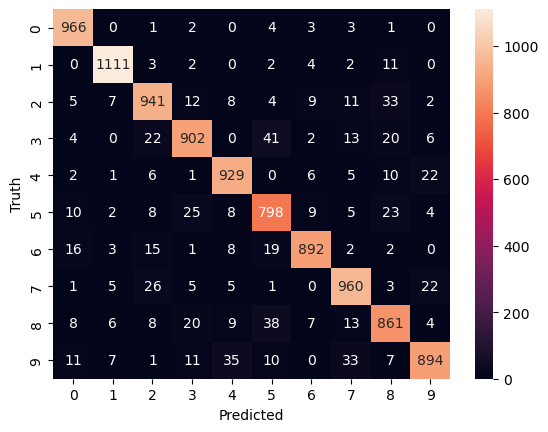

In [67]:
import seaborn as sn
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
    
])


model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8740 - loss: 0.4448
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9604 - loss: 0.1332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9725 - loss: 0.0925
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9813 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0515


In [71]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0869


[0.07763934135437012, 0.9769999980926514]

In [73]:
y_pred=model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cn=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cn

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    2,    1,    0,    1,    3,    1,    1,    0],
       [   0, 1124,    4,    0,    0,    1,    2,    1,    3,    0],
       [   6,    0, 1007,    4,    2,    0,    2,    7,    4,    0],
       [   0,    0,    6,  982,    1,    5,    1,    3,    4,    8],
       [   0,    0,    6,    0,  964,    0,    1,    2,    0,    9],
       [   2,    0,    0,    9,    3,  865,    4,    1,    5,    3],
       [   7,    3,    2,    1,    4,    7,  931,    0,    3,    0],
       [   0,    3,   10,    4,    1,    0,    0, 1006,    1,    3],
       [   6,    0,    6,    4,    1,    3,    2,    4,  947,    1],
       [   3,    5,    0,    6,    9,    2,    0,    9,    2,  973]])>

Text(50.722222222222214, 0.5, 'Truth')

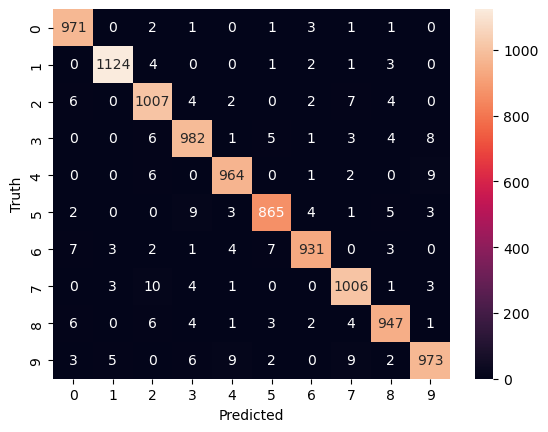

In [74]:
import seaborn as sn
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
# if we do not want to flatten X_train explitcitly

In [77]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
    
])


model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

model.fit(X_train,y_train,epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.4496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9608 - loss: 0.1346
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.0659
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9842 - loss: 0.0504


In [78]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9709 - loss: 0.0878


[0.07609499245882034, 0.9750999808311462]